## Proyek Analisis Data : Bike-Sharing
- Nama : Rizki Kurnia
- Email : rizkikurniasan12@gmail.com
- ID Dicoding :

## Defining Business Questions

- Is there a difference in usage patterns between weekends and weekdays?
- What are the trends in bike usage over time?

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import os


## Data Wrangling

### Gathering Data


In [ ]:
# Extracting Data
zip_file_path = 'Bike-sharing-dataset.zip'
extract_dir = 'C:/Users/SantiSusanti/proyek_analisis_data/Bike-sharing-dataset'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  zip_ref.extractall(extract_dir)

print("File extracted successfully : ", extract_dir)
print(os.listdir(extract_dir))

File extracted successfully :  C:/Users/SantiSusanti/proyek_analisis_data/Bike-sharing-dataset
['Readme.txt', 'hour.csv', 'day.csv']


In [ ]:
# Load day.csv
file_path = os.path.join(extract_dir, 'day.csv')
day_df = pd.read_csv(file_path)
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
# Load hour.csv
file_path = os.path.join(extract_dir, 'hour.csv')
hour_df = pd.read_csv(file_path)
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data
#### day.df

In [ ]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


#### Insight
- There are no missing values
- The dteday data type must be changed to datetime


In [ ]:
print("Duplicaated : ",day_df.duplicated().sum())

Duplicaated :  0


In [ ]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


### Information :
- instant: Unique index for each row of data.
- dteday: The date of the data.
- season: Season (1 = spring, 2 = summer, 3 = autumn, 4 = winter).
- yr: Year (0 = 2011, 1 = 2012).
- mnth: Month (1 = January, 12 = December).
- holiday: Whether it is a holiday or not (1 = yes, 0 = no).
- weekday: Day of the week (0 = Sunday, 6 = Saturday).
- workingday: Whether it is a working day or not (1 = yes, 0 = no).
- weathersit: Weather condition (1 = sunny/cloudy, 2 = cloudy, 3 = light rain, 4 = heavy rain).
- temp: Normal temperature (escalates to values ​​between 0 and 1).
- atemp: Feels-like temperature (escalates to values ​​between 0 and 1).
- hum: Humidity (escalates to values ​​between 0 and 1).
- windspeed: Wind speed (escalates to values ​​between 0 and 1).
- casual: Number of bike rentals by unregistered users.
- registered: Number of bike rentals by registered users.
- cnt: Total number of bike rentals (from registered and unregistered users).

#### hour_df

In [ ]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


#### Insight
- There are no missing values
- The dteday data type is changed to datetime

In [ ]:
print("Duplicated : ", hour_df.duplicated().sum())

Duplicated :  0


In [ ]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


## Information :
- instant: Unique index for each row of data.
- dteday: The date of the data.
- season: Season (1 = spring, 2 = summer, 3 = fall, 4 = winter).
- yr: Year (0 = 2011, 1 = 2012).
- mnth: Month (1 = January, 12 = December).
- hr: Hour (0-23, indicating the hour the data was taken).
- holiday: Whether it is a holiday or not (1 = yes, 0 = no).
- weekday: Day of the week (0 = Sunday, 6 = Saturday).
- workingday: Whether it is a working day or not (1 = yes, 0 = no).
- weathersit: Weather conditions (1 = sunny/cloudy, 2 = cloudy, 3 = light rain, 4 = heavy rain).
- temp: Normal temperature (escalates to a value between 0 and 1).
- atemp: Feels-like temperature (escalates to a value between 0 and 1).
- hum: Humidity (escalates to values ​​between 0 and 1).
- windspeed: Wind speed (escalates to values ​​between 0 and 1).
- casual: Number of bike rentals by unregistered users.
- registered: Number of bike rentals by registered users.
- cnt: Total number of bike rentals (from registered and unregistered users).

### Cleaning Data
#### day_df

In [ ]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%Y-%m-%d')
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

hour_df

In [ ]:
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'], format='%Y-%m-%d')
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Explolatory Data Analysis (EDA)
#### Explore Data day_df

In [ ]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


View customer demographics by season




In [ ]:
day_df.groupby(by='mnth').agg({
    "cnt": "sum",
    "weekday": ["max", "min", "mean", "std"]
})

cnt weekday                        
         sum     max min      mean       std
mnth                                        
1     134933       6   0  2.870968  2.060430
2     151352       6   0  3.000000  2.000000
3     228920       6   0  3.096774  1.981138
4     269094       6   0  3.000000  2.058467
5     331686       6   0  2.903226  1.981138
6     346342       6   0  3.100000  2.005923
7     344948       6   0  2.935484  2.063508
8     351194       6   0  3.000000  1.958588
9     345991       6   0  3.050000  2.045458
10    322352       6   0  2.919355  2.026856
11    254831       6   0  3.033333  1.974126
12    211036       6   0  3.064516  2.063508

<Axes: xlabel='mnth'>

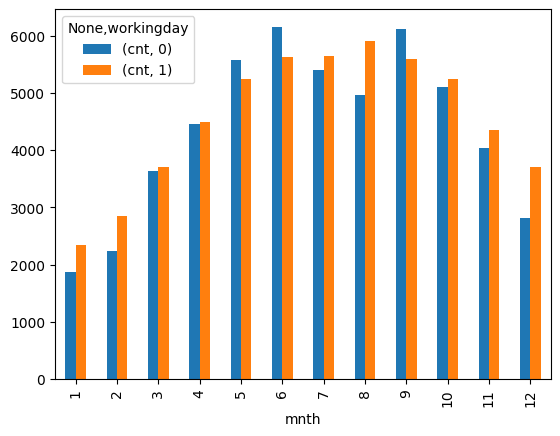

In [ ]:
day_df.groupby(['mnth', 'workingday']).agg({
    'cnt': 'mean'
}).unstack().plot(kind='bar')

In [ ]:
day_df.groupby(by='mnth').agg({
    "cnt": "sum",
    "mnth": "sum",
    "holiday": ["max", "min", "mean", "std"]
})

cnt mnth holiday                        
         sum  sum     max min      mean       std
mnth                                             
1     134933   62       1   0  0.048387  0.216335
2     151352  114       1   0  0.035088  0.185637
3     228920  186       0   0  0.000000  0.000000
4     269094  240       1   0  0.033333  0.181020
5     331686  310       1   0  0.032258  0.178127
6     346342  360       0   0  0.000000  0.000000
7     344948  434       1   0  0.032258  0.178127
8     351194  496       0   0  0.000000  0.000000
9     345991  540       1   0  0.033333  0.181020
10    322352  620       1   0  0.032258  0.178127
11    254831  660       1   0  0.066667  0.251549
12    211036  744       1   0  0.032258  0.178127

<Axes: xlabel='yr'>

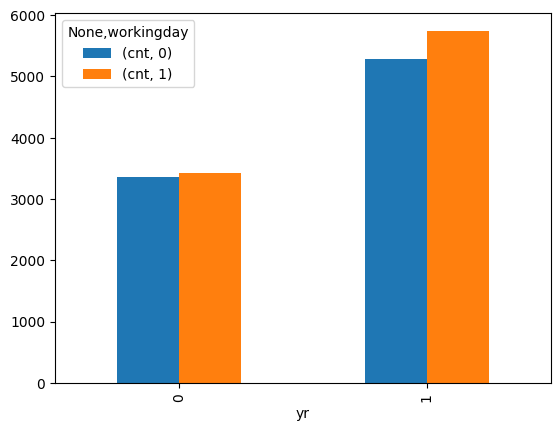

In [ ]:
day_df.groupby(['yr', 'workingday']).agg({
    'cnt': 'mean'
}).unstack().plot(kind='bar')


In [ ]:
day_df.groupby(by='yr').cnt.sum().sort_values(ascending=False)

,cnt
yr,
1,2049576
0,1243103


In [ ]:
day_df.groupby(by='season').cnt.sum().sort_values(ascending=False)

,cnt
season,
3,1061129
2,918589
4,841613
1,471348


In [ ]:
day_df.groupby(by='holiday').cnt.sum().sort_values(ascending=False)

,cnt
holiday,
0,3214244
1,78435


In [ ]:
day_df.groupby(by='weekday').cnt.sum().sort_values(ascending=False)

,cnt
weekday,
5,487790
4,485395
6,477807
3,473048
2,469109
1,455503
0,444027


## Explore Data hour_df

## Analisis Univariate

#### day_df

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### separate data based on working day

In [ ]:
working_day = day_df[day_df['workingday'] == 1]
week_day = day_df[day_df['workingday'] == 0]

In [ ]:
def is_weekday(weekday):
  return weekday in [1,2,3,4,5]

# Adding new column
day_df['is_weekday'] = day_df['weekday'].apply(is_weekday)

# Seperate data according new column
working_day = day_df[day_df['is_weekday']]
week_day = day_df[~day_df['is_weekday']]

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekday
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,True
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,True
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,True


#### Create Histogram to make comparison between weekday and workingday


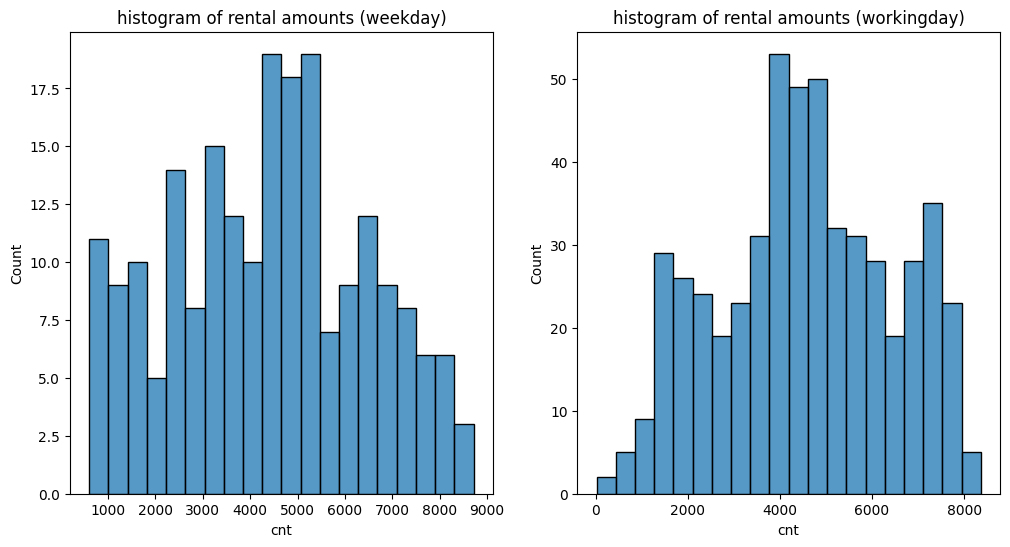

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.histplot(data=week_day, x='cnt', bins=20)
plt.title('histogram of rental amounts (weekday)')

plt.subplot(1,2,2)
sns.histplot(data=working_day, x='cnt', bins=20)
plt.title('histogram of rental amounts (workingday)')

plt.show()

In [ ]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekday
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837,NaN
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000,NaN
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000,NaN
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000,NaN
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000,NaN
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000,NaN


### Insight :
The average number of rentals on weekdays tends to be higher compared to weekends. This could be because on weekdays, many people use bicycles as a means of transportation to work or daily activities.

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekday
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,True
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,True
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,True


### Finding the tren

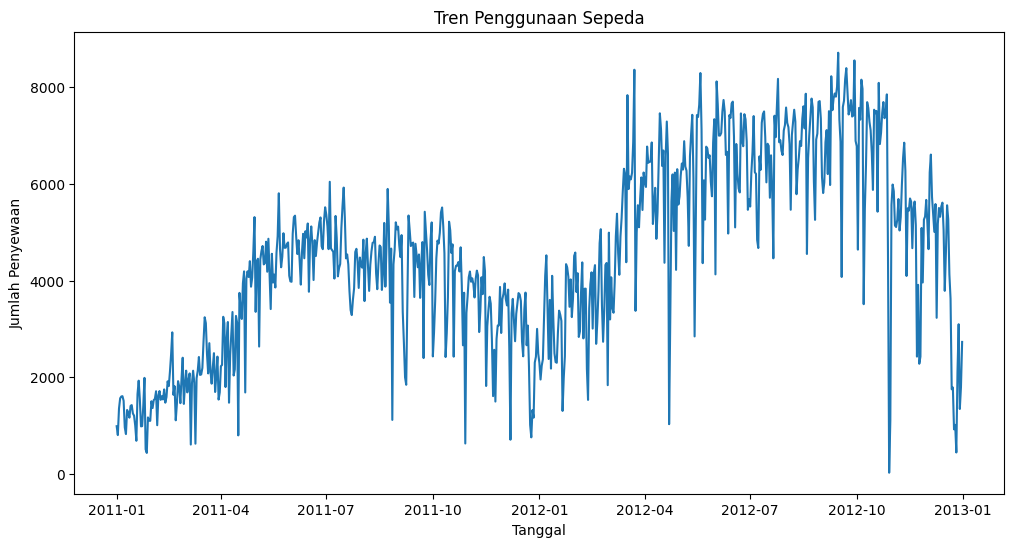

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(day_df['dteday'], day_df['cnt'])
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan')
plt.title('Tren Penggunaan Sepeda')
plt.show()


#### Insight :
There are periods where the number of rentals is consistently high, followed by periods where rentals are low, indicating that the season influences bike rental behavior
Unclear seasonal pattern

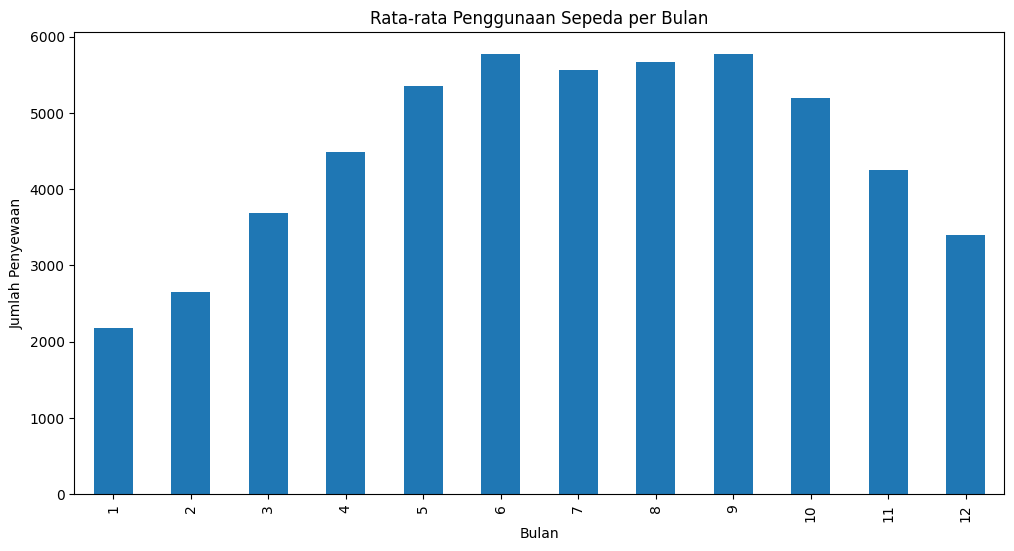

In [ ]:
# Convert 'dteday' to datetime format
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Group by month and calculate the mean
monthly_usage = day_df.groupby(day_df['dteday'].dt.month)['cnt'].mean()

# Plot the monthly usage
plt.figure(figsize=(12, 6))
monthly_usage.plot(kind='bar')
plt.title('Rata-rata Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

#### Insight:
There is a fairly clear seasonal pattern to bike usage. Bike rentals tend to increase in some months and decrease in others.

In [ ]:
# Calculate the correlation between season and cnt
korelasi = day_df['season'].corr(day_df['cnt'])
print('Korelasi antara season dan jumlah penyewaan:', korelasi)

Korelasi antara season dan jumlah penyewaan: 0.4061003707986365


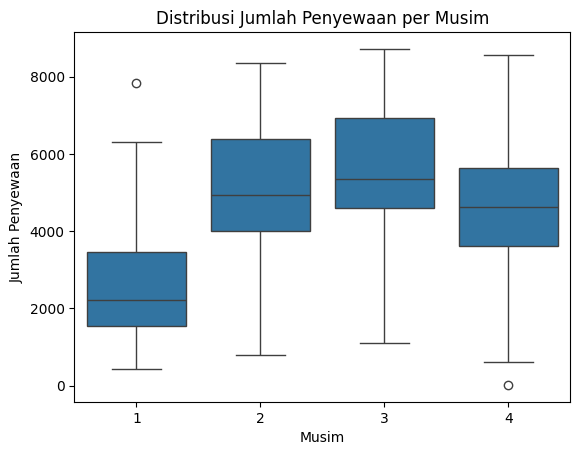

In [ ]:
sns.boxplot(x='season', y='cnt', data=day_df)
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewaan')
plt.title('Distribusi Jumlah Penyewaan per Musim')
plt.show()

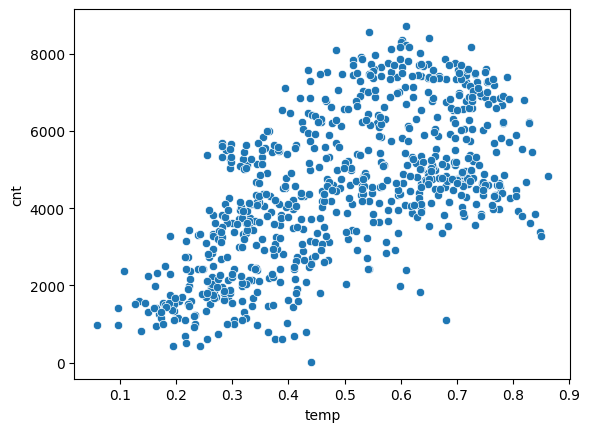

In [ ]:
# Scatter plot
sns.scatterplot(x='temp', y='cnt', data=day_df)
plt.show()


# Visualization and Exploratory Data Analysis
### Question 1
Is there a difference in rental patterns between weekdays and weekends?

In [ ]:
print(day_df.dtypes)

instant                int64
dteday        datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
is_weekday              bool
dtype: object


In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekday
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,True
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,True
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,True


In [ ]:
monthly_data_df = day_df.resample(rule='ME', on='dteday').agg({
    "cnt": "sum",  # Total number of bike rentals per month
    "casual": "sum",  # Total casual borrowing per month
    "registered": "sum"  # Total registered loans per month
    })

monthly_data_df.index = monthly_data_df.index.strftime('%Y-%m')  # Change the index format to YYYY-MM
monthly_data_df = monthly_data_df.reset_index()  # Reset index so that dteday becomes a regular column

monthly_data_df.rename(columns={
    "cnt": "total_rentals",
    "casual": "casual_rentals",
    "registered": "registered_rentals"
}, inplace=True)


monthly_data_df.head()

,dteday,total_rentals,casual_rentals,registered_rentals
0,2011-01,38189,3073,35116
1,2011-02,48215,6242,41973
2,2011-03,64045,12826,51219
3,2011-04,94870,22346,72524
4,2011-05,135821,31050,104771


In [ ]:
print(monthly_data_df.dtypes)

dteday                object
total_rentals          int64
casual_rentals         int64
registered_rentals     int64
dtype: object


In [ ]:
# Grouping based on weekday (0=Monday, 6=Sunday) and workingday (1=working day)
day_df['dteday'] = pd.to_datetime(day_df['dteday'], format='%Y-%m-%d')
weekday_analysis_df = day_df.groupby('weekday').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
}).reset_index()

workingday_analysis_df = day_df.groupby('workingday').agg({
    'cnt': 'mean',
    'casual': 'mean',
    'registered': 'mean'
})

In [ ]:
print(weekday_analysis_df)
print(workingday_analysis_df)

   weekday          cnt       casual   registered
0        0  4228.828571  1338.295238  2890.533333
1        1  4338.123810   674.133333  3663.990476
2        2  4510.663462   556.182692  3954.480769
3        3  4548.538462   551.144231  3997.394231
4        4  4667.259615   590.961538  4076.298077
5        5  4690.288462   752.288462  3938.000000
6        6  4550.542857  1465.257143  3085.285714
                    cnt       casual   registered
workingday                                       
0           4330.168831  1371.134199  2959.034632
1           4584.820000   606.570000  3978.250000


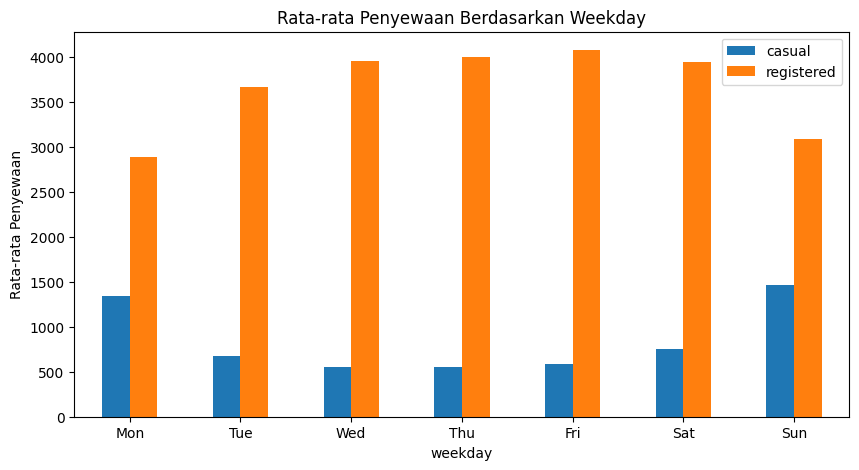

In [ ]:
# Visualization of Average Rentals by Weekday
weekday_analysis_df.plot(x='weekday', y=['casual', 'registered'], kind='bar', figsize=(10, 5))
plt.title('Rata-rata Penyewaan Berdasarkan Weekday')
plt.ylabel('Rata-rata Penyewaan')
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.show()


<Figure size 1000x600 with 0 Axes>

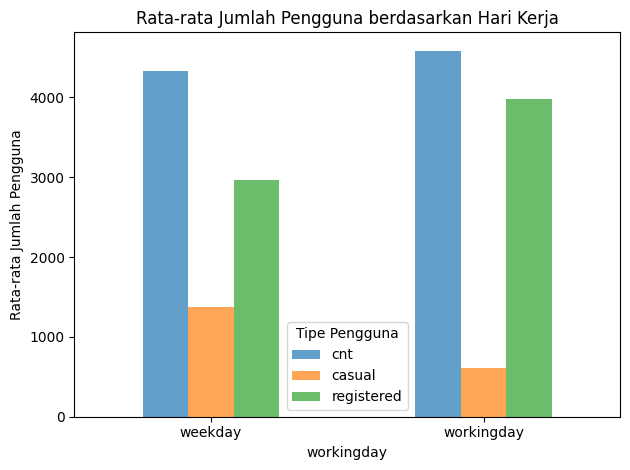

In [ ]:
# Setting image size
plt.figure(figsize=(10, 6))

# Using Seaborn to create a bar chart
workingday_analysis_df.plot(kind='bar', alpha=0.7)

# Adding titles and labels
plt.title('Rata-rata Jumlah Pengguna berdasarkan Hari Kerja')
plt.xlabel('workingday')
plt.xticks(ticks=range(2), labels=['weekday', 'workingday'], rotation=0)
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.xticks(rotation=0)

# Showing legend
plt.legend(title='Tipe Pengguna')

# Display plot
plt.tight_layout()
plt.show()

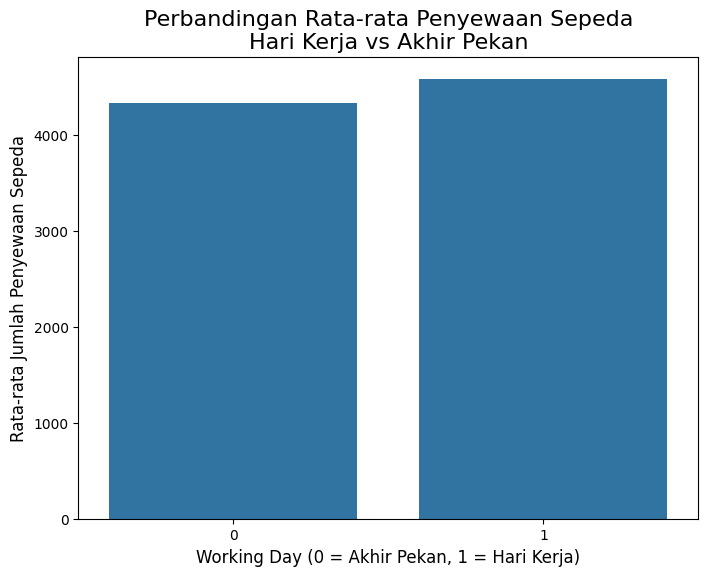

In [60]:
# Calculate average rental for weekdays and weekends
avg_rentals_df = day_df.groupby('workingday')['cnt'].mean()

# Creating a plot
plt.figure(figsize=(8, 6))
sns.barplot(x=avg_rentals_df.index, y=avg_rentals_df.values)

# Add axis titles and labels
plt.title('Perbandingan Rata-rata Penyewaan Sepeda\nHari Kerja vs Akhir Pekan', fontsize=16)
plt.xlabel('Working Day (0 = Akhir Pekan, 1 = Hari Kerja)', fontsize=12)
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda', fontsize=12)

# Display plot
plt.show()


Insight:
The difference in patterns between weekdays and weekends in terms of bike rentals is not very significant, but there is a tendency for more bike rentals on weekdays. This could be due to the need for daily transportation on weekdays, while on weekends, bike rentals are more likely to be used for recreation or other activities.

### Question 2
What is the trend in bicycle use over time?

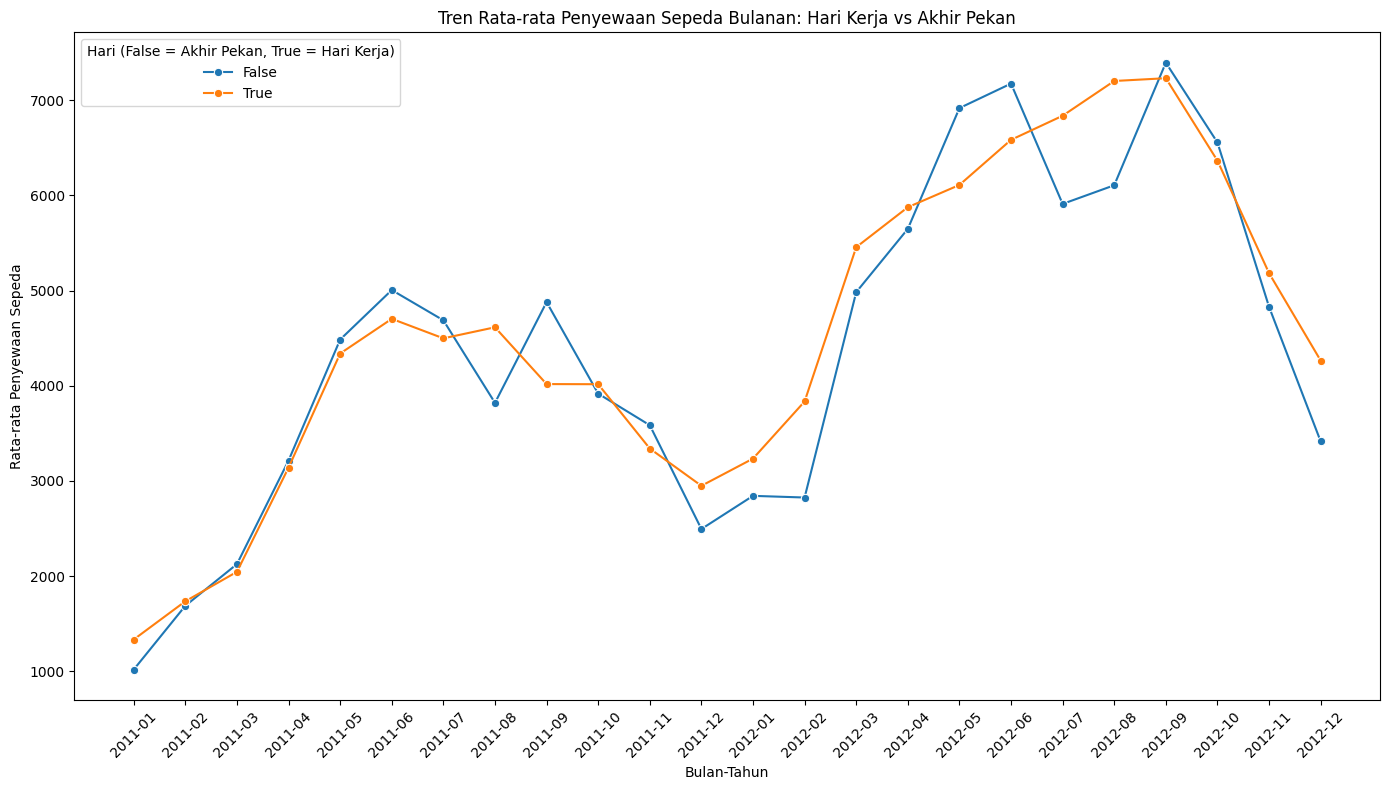

In [ ]:
# Mengubah kolom 'dteday' menjadi tipe datetime
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Membuat kolom baru untuk bulan-tahun
day_df['year_month'] = day_df['dteday'].dt.to_period('M').astype(str)

# Menghitung rata-rata penyewaan sepeda bulanan berdasarkan hari kerja dan akhir pekan
monthly_trend_df = day_df.groupby(['year_month', 'is_weekday'])['cnt'].mean().reset_index()

# Plot menggunakan seaborn
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_trend_df, x='year_month', y='cnt', hue='is_weekday', marker='o')
plt.title('Tren Rata-rata Penyewaan Sepeda Bulanan: Hari Kerja vs Akhir Pekan')
plt.xlabel('Bulan-Tahun')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(rotation=45)
plt.legend(title='Hari (False = Akhir Pekan, True = Hari Kerja)')
plt.tight_layout()
plt.show()

In [ ]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekday,year_month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,2011-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False,2011-01
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,True,2011-01
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,True,2011-01
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,True,2011-01


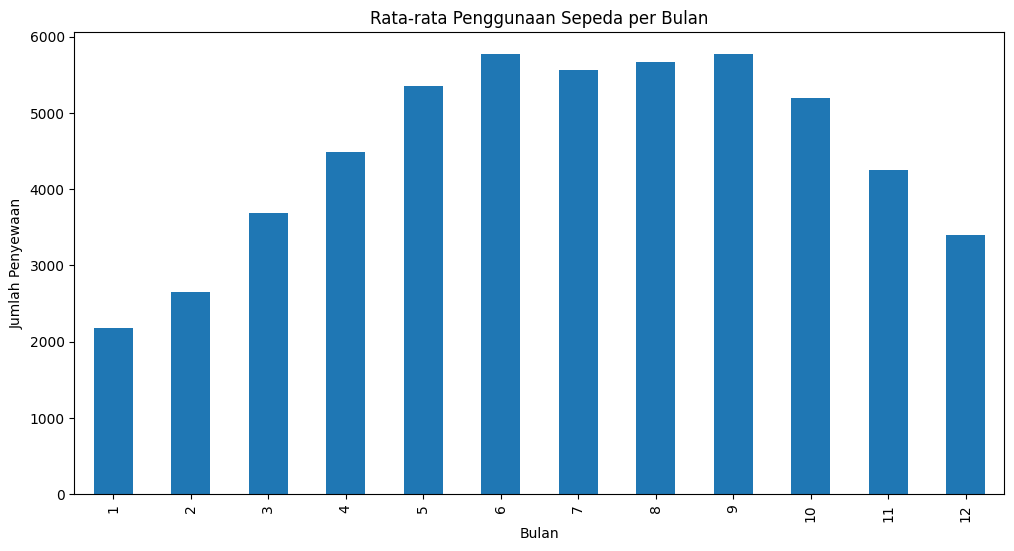

In [ ]:
# Group by month and calculate the mean
monthly_usage_df = day_df.groupby(day_df['dteday'].dt.month)['cnt'].mean()

# Plot the monthly usage
plt.figure(figsize=(12, 6))
monthly_usage.plot(kind='bar')
plt.title('Rata-rata Penggunaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.show()

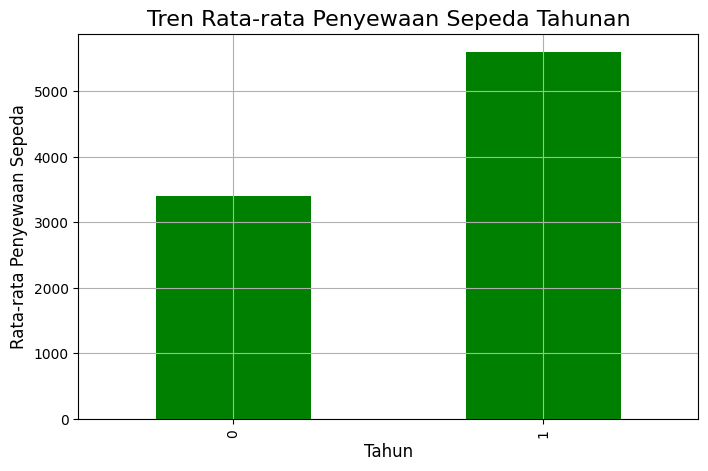

In [61]:
# Calculating the average annual rental
yearly_trend_df = day_df.groupby('yr')['cnt'].mean()

# Creating a yearly trend plot
plt.figure(figsize=(8, 5))
yearly_trend_df.plot(kind='bar', color='green')
plt.title('Tren Rata-rata Penyewaan Sepeda Tahunan', fontsize=16)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Rata-rata Penyewaan Sepeda', fontsize=12)
plt.grid(True)
plt.show()


Insight :
The trend shows that bike rentals peak in the summer and decline significantly during the winter. The increase in the trend from April to September is likely due to more comfortable weather for cycling. Meanwhile, the decrease in the winter months is due to more extreme weather factors that are less conducive to cycling.

In [ ]:
day_df.to_csv("main_data.csv", index=False)


In [ ]:
df = pd.read_csv('main_data.csv')
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,is_weekday,year_month
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985,False,2011-01
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801,False,2011-01
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349,True,2011-01
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562,True,2011-01
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600,True,2011-01
